In [1]:
import feedparser, spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Retrieve RSS feed
feed = feedparser.parse("https://rss.nytimes.com/services/xml/rss/nyt/HomePage.xml")
titles = [entry.title for entry in feed.entries]

titles

['Trump Decries Anti-Tariff Ad From Ontario, Canada, That Faithfully Quotes Reagan Speech',
 'A Major Crypto Pardon, and the N.B.A. Gambling Scandal With Mob Ties',
 'Letitia James Case Shows Ruthlessness of Justice Dept. in Trump’s Grip',
 'Letitia James to Appear in Court as Battle Over Trump-Urged Prosecution Begins',
 'A Quick Route to Rebuild Half of Gaza, or Another U.S. Pipe Dream?',
 'U.S. Diplomats Will Work With Troops to Maintain Gaza Cease-Fire, Rubio Says',
 'Who Were the 2,000 Palestinians Freed by Israel?',
 'N.B.A. Gambling Scandal Reflects America’s Obsession With Sports Betting',
 'NBA Gambling Scandal: What We Know',
 'The Wider Costs of the N.B.A. Insider-Trading Scandal',
 'Can Ken Burns Win the American Revolution?',
 'From Truman to Trump: A Tale of Two White House Renovations',
 'Trump’s Ballroom Project Claims 123-Year-Old East Wing',
 'Renovations at the White House Aren’t Unusual. But Trump’s Makeover Is.',
 'Ukraine’s ‘Coalition of the Willing’ Has the Wind 

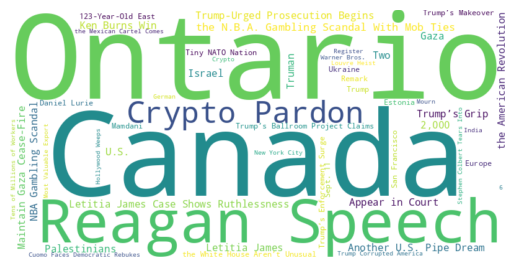

In [2]:
# 2. Named Entity Recognition
nlp = spacy.load("en_core_web_sm")
entities = []
for title in titles:
    doc = nlp(title)
    entities += [ent.text for ent in doc.ents]

# 3. Count entity frequencies
freq = Counter(entities)

# 4. Word cloud visualization
wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(freq)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
entities

['Ontario',
 'Canada',
 'Reagan Speech',
 'Crypto Pardon',
 'the N.B.A. Gambling Scandal With Mob Ties',
 'Letitia James Case Shows Ruthlessness',
 'Trump’s Grip',
 'Letitia James',
 'Appear in Court',
 'Trump-Urged Prosecution Begins',
 'Gaza',
 'Another U.S. Pipe Dream',
 'U.S.',
 'Maintain Gaza Cease-Fire',
 '2,000',
 'Palestinians',
 'Israel',
 'NBA Gambling Scandal',
 'Ken Burns Win',
 'the American Revolution',
 'Truman',
 'Two',
 'Trump’s Ballroom Project Claims',
 '123-Year-Old East',
 'the White House Aren’t Unusual',
 'Trump’s Makeover',
 'Ukraine',
 'Europe',
 'Estonia',
 'Tiny NATO Nation',
 'San Francisco',
 'Daniel Lurie',
 'Trump’s Enforcement Surge',
 'Trump',
 'Remark',
 'Mamdani',
 'Sept. 11',
 'Cuomo Faces Democratic Rebukes',
 '6',
 'New York City',
 'Register',
 'Crypto',
 'Trump Corrupted America',
 'Mourn',
 'Stephen Colbert Tears Into',
 'Hollywood Weeps',
 'Warner Bros.',
 'the Mexican Cartel Comes',
 'India',
 'Most Valuable Export',
 'Tens of Millions of Work

In [3]:
from sentence_transformers import SentenceTransformer
import umap
import plotly.express as px


In [4]:
# 2. Compute embeddings (e.g. using all-MiniLM-L6-v2: fast & good)
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(titles, show_progress_bar=True)
embeddings

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

array([[-0.04632998,  0.05416911,  0.05881205, ...,  0.04246817,
         0.05794477, -0.03012113],
       [-0.0527814 ,  0.04560901, -0.07819773, ..., -0.0866698 ,
         0.04191605, -0.05129502],
       [-0.01170724,  0.04295135,  0.00171857, ..., -0.0311229 ,
         0.11461452,  0.02358512],
       ...,
       [-0.03843027,  0.06919606, -0.00741882, ...,  0.04089923,
         0.06482762, -0.00216829],
       [-0.01460477, -0.00779593, -0.08921093, ..., -0.02326447,
         0.01276927,  0.03885699],
       [-0.06809074, -0.04295662, -0.04148536, ..., -0.0345485 ,
        -0.00053163,  0.05165755]], shape=(33, 384), dtype=float32)

In [8]:
# 3. Dimensionality reduction with UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embeddings_2d = reducer.fit_transform(embeddings)

/home/renku/work/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [9]:
embeddings_2d

array([[ 1.185622  ,  6.04739   ],
       [ 0.9770466 ,  5.519759  ],
       [ 1.5287378 ,  6.282293  ],
       [ 1.8184248 ,  6.5627728 ],
       [-0.2945317 ,  8.277844  ],
       [ 0.12957057,  8.717491  ],
       [ 0.98118806,  7.0377254 ],
       [-0.68394065,  8.60623   ],
       [ 0.12793182,  7.757035  ],
       [ 0.58569485,  8.023314  ],
       [ 0.70336103,  8.758655  ],
       [-1.0409358 ,  7.5680323 ],
       [-0.4697868 ,  6.1546607 ],
       [-0.01720174,  6.119591  ],
       [ 0.52873427,  6.1209426 ],
       [ 1.667182  ,  5.5548177 ],
       [-0.0335483 ,  7.187844  ],
       [ 0.51446015,  7.1570044 ],
       [ 1.0725856 ,  8.137198  ],
       [-0.8718575 ,  7.1246123 ],
       [ 1.6288687 ,  7.329086  ],
       [-1.2017653 ,  8.29157   ],
       [-0.34098962,  9.070306  ]], dtype=float32)

In [10]:
# 4. Interactive scatter plot with tooltips
fig = px.scatter(
    x=embeddings_2d[:, 0],
    y=embeddings_2d[:, 1],
    hover_name=titles,  # tooltip shows titles
    title="NY Times Titles – UMAP Projection of Embeddings"
)

fig.update_traces(marker=dict(size=8))
fig.show()